In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold 
import scipy.stats as stats
import pylab
from numpy import mean
from numpy import std

In [2]:
df=pd.read_csv("DataLab/heart.csv")


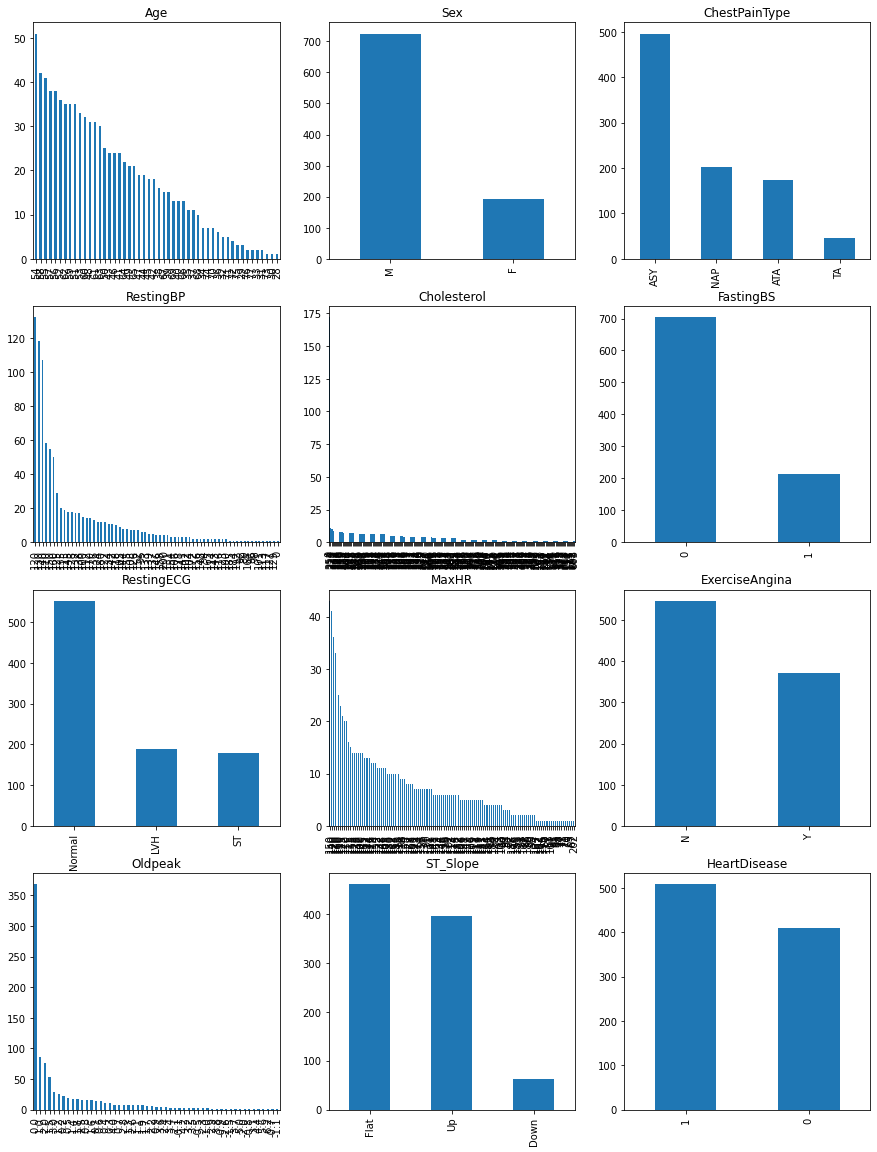

In [3]:
fig,axe= plt.subplots(int(len(df.columns)/3),3,figsize=(15,20))
i=0
for triaxis in axe:
    for axis in triaxis:
        axis.title.set_text(df.columns[i])
        df[df.columns[i]].value_counts().plot(kind="bar",ax=axis)
        i=i+1

<AxesSubplot:>

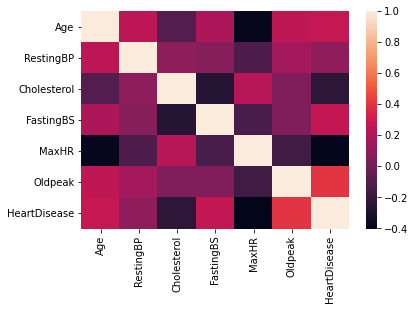

In [4]:
sns.heatmap(df.corr())

<ipython-input-4-90f0e19bca37>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(bins=20,ax=ax)


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RestingBP'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>],
       [<AxesSubplot:title={'center':'FastingBS'}>,
        <AxesSubplot:title={'center':'MaxHR'}>,
        <AxesSubplot:title={'center':'Oldpeak'}>],
       [<AxesSubplot:title={'center':'HeartDisease'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

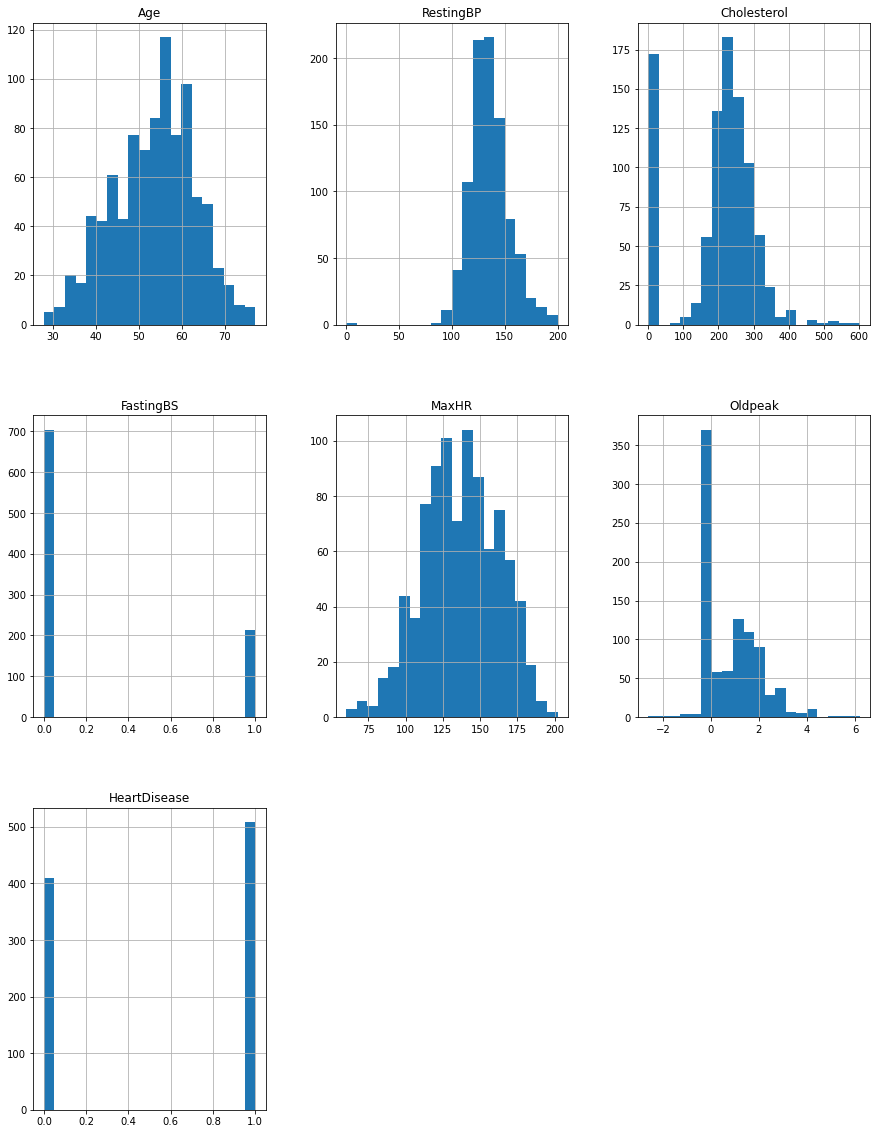

In [4]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()

df.hist(bins=20,ax=ax)

In [5]:
df['Sex']=[1 if i=='M' else 0 for i in df['Sex'] ]
df['ExerciseAngina']=[1 if i=='Y' else 0 for i in df['ExerciseAngina']]
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110,264,0,Normal,132,0,1.2,Flat,1
914,68,1,ASY,144,193,1,Normal,141,0,3.4,Flat,1
915,57,1,ASY,130,131,0,Normal,115,1,1.2,Flat,1
916,57,0,ATA,130,236,0,LVH,174,0,0.0,Flat,1


In [6]:
df=df.join(pd.get_dummies(df['ChestPainType']))
df=df.join(pd.get_dummies(df['RestingECG']))
df=df.join(pd.get_dummies(df['ST_Slope']))

In [7]:
df=df.drop(axis=1,columns=['ChestPainType','RestingECG','ST_Slope'])
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,Up
0,40,1,140,289,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1.2,1,0,0,0,1,0,1,0,0,1,0
914,68,1,144,193,1,141,0,3.4,1,1,0,0,0,0,1,0,0,1,0
915,57,1,130,131,0,115,1,1.2,1,1,0,0,0,0,1,0,0,1,0
916,57,0,130,236,0,174,0,0.0,1,0,1,0,0,1,0,0,0,1,0


In [8]:
columns_titles = df.columns
df['HeartDisease'],df['Up']=df['Up'],df['HeartDisease']
df=df.rename(columns={"HeartDisease":"Up","Up":"HeartDisease"})
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,Up,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,HeartDisease
0,40,1,140,289,0,172,0,0.0,1,0,1,0,0,0,1,0,0,0,0
1,49,0,160,180,0,156,0,1.0,0,0,0,1,0,0,1,0,0,1,1
2,37,1,130,283,0,98,0,0.0,1,0,1,0,0,0,0,1,0,0,0
3,48,0,138,214,0,108,1,1.5,0,1,0,0,0,0,1,0,0,1,1
4,54,1,150,195,0,122,0,0.0,1,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1.2,0,0,0,0,1,0,1,0,0,1,1
914,68,1,144,193,1,141,0,3.4,0,1,0,0,0,0,1,0,0,1,1
915,57,1,130,131,0,115,1,1.2,0,1,0,0,0,0,1,0,0,1,1
916,57,0,130,236,0,174,0,0.0,0,0,1,0,0,1,0,0,0,1,1


In [9]:
X,y = df[df.columns[:-1]],df[df.columns[-1]]

In [10]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=17)

In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PowerTransformer

In [12]:
gaus=GaussianNB()

In [13]:
#function to return plots for the feature
def normality(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=pylab)
    plt.show()

In [14]:
from sklearn.metrics import roc_auc_score

In [15]:
df.skew()

Age              -0.195933
Sex              -1.424540
RestingBP         0.179839
Cholesterol      -0.610086
FastingBS         1.264484
MaxHR            -0.144359
ExerciseAngina    0.391329
Oldpeak           1.022872
Up                0.282079
ASY              -0.162011
ATA               1.595899
NAP               1.346107
TA                4.130983
LVH               1.465445
Normal           -0.414489
ST                1.551033
Down              3.418081
Flat             -0.004364
HeartDisease     -0.215086
dtype: float64

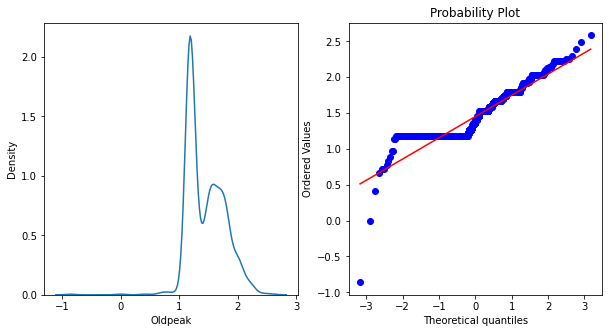

In [16]:
df['Oldpeak']=df['Oldpeak']+3
df['Oldpeak'],parameters=stats.boxcox(df['Oldpeak'])
normality(df,'Oldpeak')

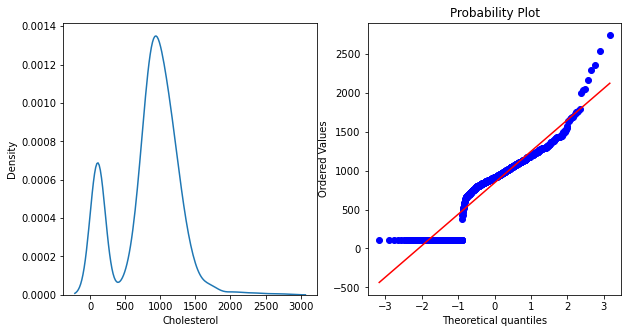

In [17]:
df['Cholesterol']=df['Cholesterol']+50
df['Cholesterol'],parameters=stats.boxcox(df['Cholesterol'])
normality(df,'Cholesterol')

In [18]:
df.skew()

Age              -0.195933
Sex              -1.424540
RestingBP         0.179839
Cholesterol      -0.261916
FastingBS         1.264484
MaxHR            -0.144359
ExerciseAngina    0.391329
Oldpeak           0.040079
Up                0.282079
ASY              -0.162011
ATA               1.595899
NAP               1.346107
TA                4.130983
LVH               1.465445
Normal           -0.414489
ST                1.551033
Down              3.418081
Flat             -0.004364
HeartDisease     -0.215086
dtype: float64

In [19]:
gaus.fit(X_train,y_train)

GaussianNB()

In [20]:
roc_auc_score(y_test,gaus.predict(X_test))

0.8434343434343434

In [21]:
X,y = df[df.columns[:-1]],df[df.columns[-1]]

In [22]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=17)

In [23]:
gaus.fit(X_train,y_train)

GaussianNB()

In [24]:
roc_auc_score(y_test,gaus.predict(X_test))

0.8469065656565656

In [25]:
from sklearn.metrics import confusion_matrix

In [37]:
labels=["Have disiase","Healthy"]

<AxesSubplot:>

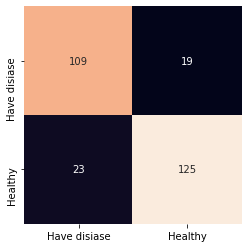

In [38]:
mat = confusion_matrix(y_test, gaus.predict(X_test))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=labels, yticklabels=labels)
